# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [88]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    
    #Estimación puntual de la distribución binomial.
    
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    
    #Acumulado de la distribución binomial.
    
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    
    #Función cuantil a partir de la distribución binomial.
    
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    
    #Genera variables aleatorias a partir de la distribución binomial.
    
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [89]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


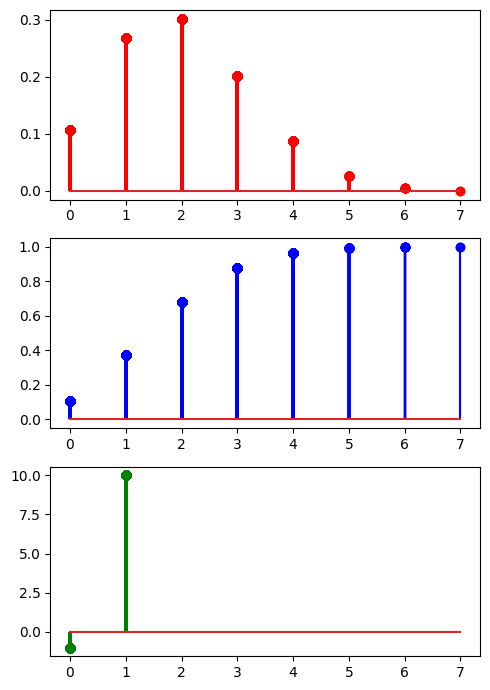

In [90]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

## DISTRIBUCIÓN UNIFORME

In [91]:
from scipy.stats import uniform

#Variables aleatorias
def va_uniforme(n, a, b):    
    result = uniform.rvs(loc = a, scale = b-a, size = n)
    return result

#Función de densidad de probabilidad
def fdp_uniforme(x, a, b):
    result = uniform.pdf(x, loc = a, scale = b-a)
    return result

#Función de distribución acumulativa
def fda_uniforme(x, a, b):
    result = uniform.cdf(x, loc = a, scale = b-a)
    return result

#Función de punto porcentual (inversa de cdf — percentiles).
def fpp_uniforme(q, a, b):
    result = uniform.ppf(q, loc = a, scale = b-a)
    return result

In [99]:
# Distribución uniforme(10, 20), dónde a = 10 es el limite inferior y b = 20 es el limite superior
print("Genera n = 10 valores aleatorios entre los limites a = 10 y b = 20:")
print(va_uniforme(10,10,20))
print("---------------------------------------------------------------------------------------------------------------------------")

print("La probabilidad de un valor x = 15 entre los limites a = 10 y b = 20:")
print(fdp_uniforme(15,10,20))
print("Nota: Esta funcion siempre devolvera 1/(b-a) si x esta entre a y b, en otro caso sera 0.")
print("---------------------------------------------------------------------------------------------------------------------------")

print("La probabilidad acumulada de un valor x = 19 entre los limites a = 10 y b = 20:")
print(fda_uniforme(19,10,20))
print("Nota: Esta funcion siempre devolvera (x-a)/(b-a) si x esta entre a y b, si es menor a ese rango sera 0, si es mayor sera 1.")
print("---------------------------------------------------------------------------------------------------------------------------")

print("El percentil q, devuelve el valor x tal que P(X<=x) = q :")
print(fpp_uniforme(0.9,10,20))
print("Nota: Esta funcion es la inversa de la funcion anterior.")

Genera n = 10 valores aleatorios entre los limites a = 10 y b = 20:
[10.51956578 17.86278199 12.01363782 12.58620835 11.64706353 13.30215065
 17.56751506 15.1938586  12.04881274 18.77830078]
---------------------------------------------------------------------------------------------------------------------------
La probabilidad de un valor x = 15 entre los limites a = 10 y b = 20:
0.1
Nota: Esta funcion siempre devolvera 1/(b-a) si x esta entre a y b, en otro caso sera 0.
---------------------------------------------------------------------------------------------------------------------------
La probabilidad acumulada de un valor x = 19 entre los limites a = 10 y b = 20:
0.9
Nota: Esta funcion siempre devolvera (x-a)/(b-a) si x esta entre a y b, si es menor a ese rango sera 0, si es mayor sera 1.
---------------------------------------------------------------------------------------------------------------------------
El percentil q, devuelve el valor x tal que P(X<=x) = q :
19.0
Not

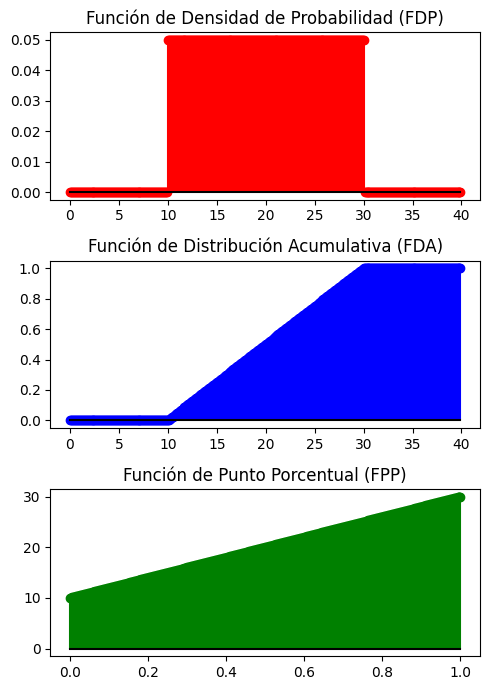

In [100]:
a = 10
b = 30
datos = np.arange(0, 40, 0.1)

fdp = fdp_uniforme(datos, a, b)
fda = fda_uniforme(datos, a, b)
fpp = fpp_uniforme(np.linspace(0, 1, len(datos)), a, b)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(datos, fdp, linefmt="r-", markerfmt="ro", basefmt="k-")
axis[1].stem(datos, fda, linefmt="b-", markerfmt="bo", basefmt="k-")
axis[2].stem(np.linspace(0, 1, len(datos)), fpp, linefmt="g-", markerfmt="go", basefmt="k-")

axis[0].set_title("Función de Densidad de Probabilidad (FDP)")
axis[1].set_title("Función de Distribución Acumulativa (FDA)")
axis[2].set_title("Función de Punto Porcentual (FPP)")

plt.tight_layout()
plt.show()

## DISTRIBUCIÓN NORMAL

In [101]:
from scipy.stats import norm

#Variables Aleatorias
def va_normal(n, μ, σ):    
    result = norm.rvs(loc = μ, scale =σ, size = n)
    return result

#Función de Densidad de Probabilidad
def fdp_normal(x, μ, σ):
    result = norm.pdf(x, loc = μ, scale = σ)
    return result

#Función de Distribución Acumulativa
def fda_normal(x, μ, σ):
    result = norm.cdf(x, loc = μ, scale = σ)
    return result

#Función de Punto Porcentual (inversa de cdf — percentiles).
def fpp_normal(q, μ, σ):
    result = norm.ppf(q, loc = μ, scale = σ)
    return result

In [102]:
# Distribución normal estandar (0, 1), dónde μ = 0 es la media y σ = 1 es la desviación estandar.
print("Genera n = 10 valores aleatorios de la distribucion normal estandar")
print(va_normal(10,0,1))
print("---------------------------------------------------------------------------------------------------------------------------")

print("La probabilidad de la distribuvion en un punto x = 1:")
print(fdp_normal(1,0,1))
print("---------------------------------------------------------------------------------------------------------------------------")

print("La probabilidad acumulada de un valor x = 0 (la mitad de la distribucion): ")
print(fda_normal(0,0,1))
print("---------------------------------------------------------------------------------------------------------------------------")

print("El percentil q, devuelve el valor x tal que P(X<=x) = q :")
print(fpp_normal(0.5,0,1))
print("Nota: Esta funcion es la inversa de la funcion anterior.")

Genera n = 10 valores aleatorios de la distribucion normal estandar
[-0.29181127 -1.56319081  0.88310978 -0.0778372  -0.18047991  3.19310757
  0.29875291 -0.75179105 -0.4263576   1.14844571]
---------------------------------------------------------------------------------------------------------------------------
La probabilidad de la distribuvion en un punto x = 1:
0.24197072451914337
---------------------------------------------------------------------------------------------------------------------------
La probabilidad acumulada de un valor x = 0 (la mitad de la distribucion): 
0.5
---------------------------------------------------------------------------------------------------------------------------
El percentil q, devuelve el valor x tal que P(X<=x) = q :
0.0
Nota: Esta funcion es la inversa de la funcion anterior.


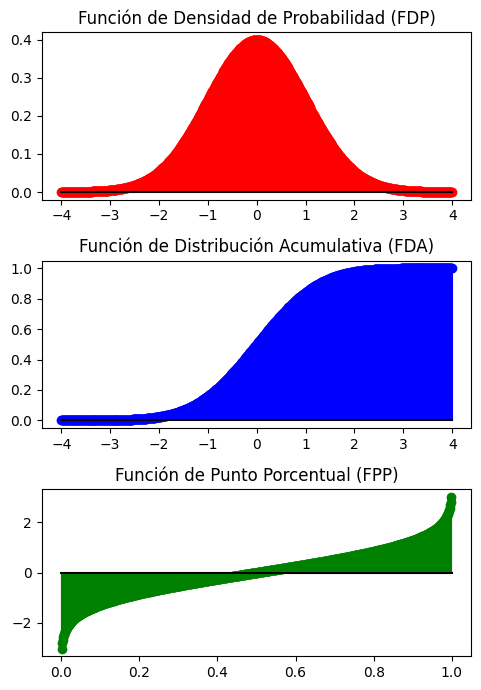

In [115]:
μ = 0
σ = 1
datos = np.arange(-4, 4, 0.01)

fdp = fdp_normal(datos, μ, σ)
fda = fda_normal(datos, μ, σ)
fpp = fpp_normal(np.linspace(0, 1, len(datos)), μ, σ)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(datos, fdp, linefmt="r-", markerfmt="ro", basefmt="k-")
axis[1].stem(datos, fda, linefmt="b-", markerfmt="bo", basefmt="k-")
axis[2].stem(np.linspace(0, 1, len(datos)), fpp, linefmt="g-", markerfmt="go", basefmt="k-")

axis[0].set_title("Función de Densidad de Probabilidad (FDP)")
axis[1].set_title("Función de Distribución Acumulativa (FDA)")
axis[2].set_title("Función de Punto Porcentual (FPP)")

plt.tight_layout()
plt.show()